In [1]:
using Pkg, CairoMakie, LaTeXStrings, LinearAlgebra
Pkg.activate("/Users/jiyong/.juliaenv/image")
using OpenCV, TestImages
include("cvext.jl")

  Activating project at `~/.juliaenv/image`


cvSize (generic function with 1 method)

In [2]:
img0= testimage_dip3e("Fig0227(a)(washington_infrared).tif")
img1 = cv.resize(img2mat(img0), cv.Size{Int32}(256, 256))
img2 = arr2mat(round.(UInt8, ((img1./255).^0.5)*255))
img3 = arr2mat(round.(UInt8, ((img1./255).^2)*255))
img4 = arr2mat(round.(UInt8, ((img1./255).^5)*255));

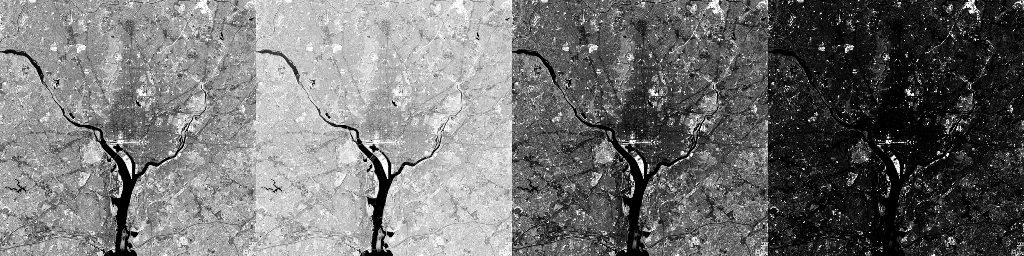

In [3]:
arr2mat(cat(img1, img2, img3, img4; dims=2))

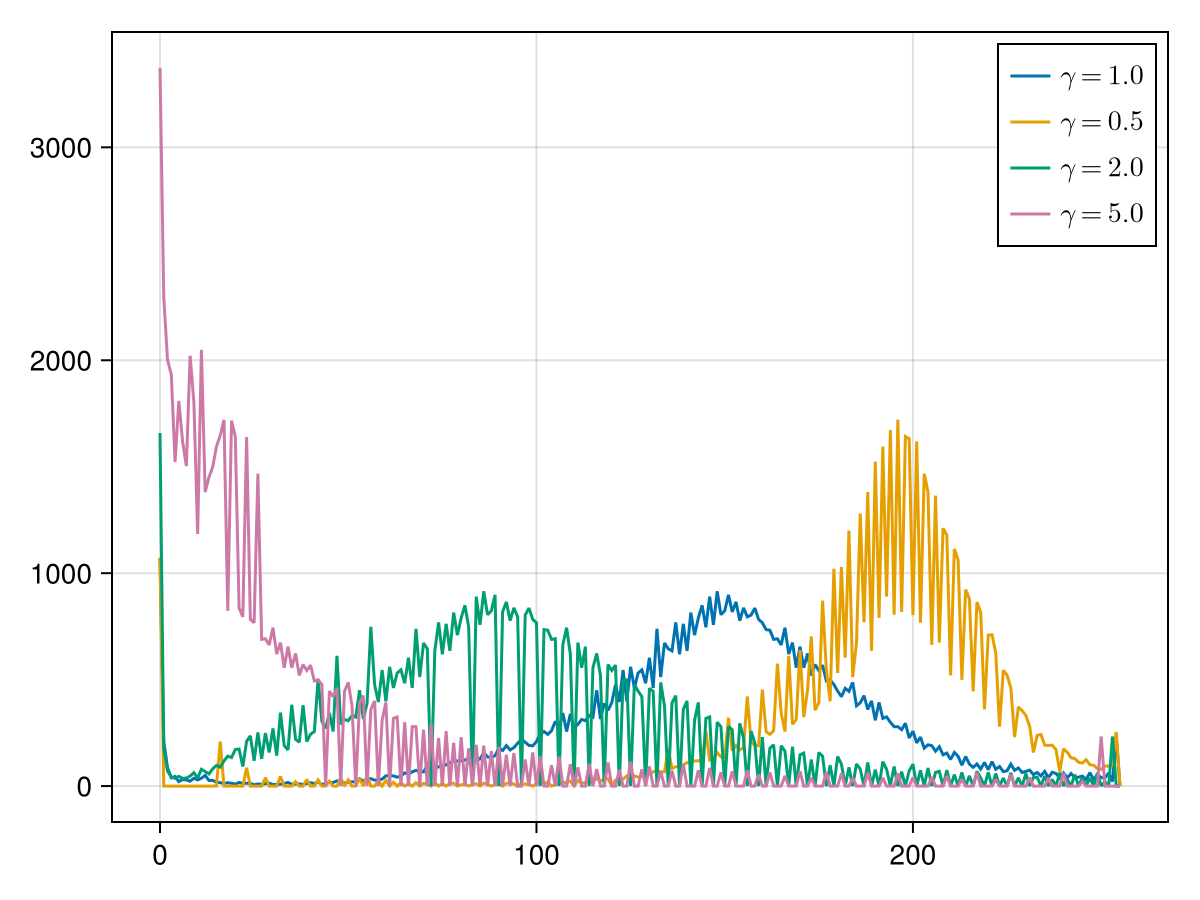

In [5]:
fig = Figure()
ax = Axis(fig[1,1])
for (img, g) in zip([img1, img2, img3, img4], [1.0, 0.5, 2, 5])
    b, v = histogram1d(img)
    lines!(ax, b, v, label = L"\gamma = %$g")
end
axislegend()
fig

In [6]:
#save("histogram_gamma.png", fig)

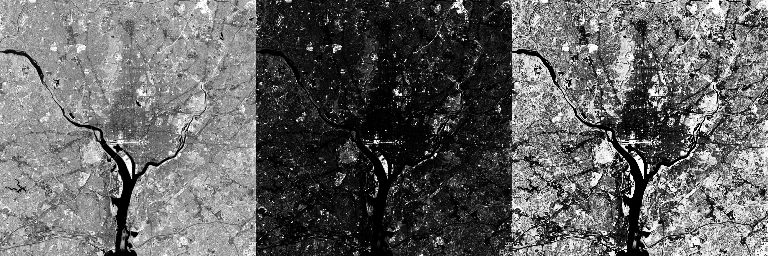

In [8]:
img5 = cv.equalizeHist(img4)
s = arr2mat(cat(img1, img4, img5; dims=2))
# cv.imwrite("equalize_histogram_1.png", s)

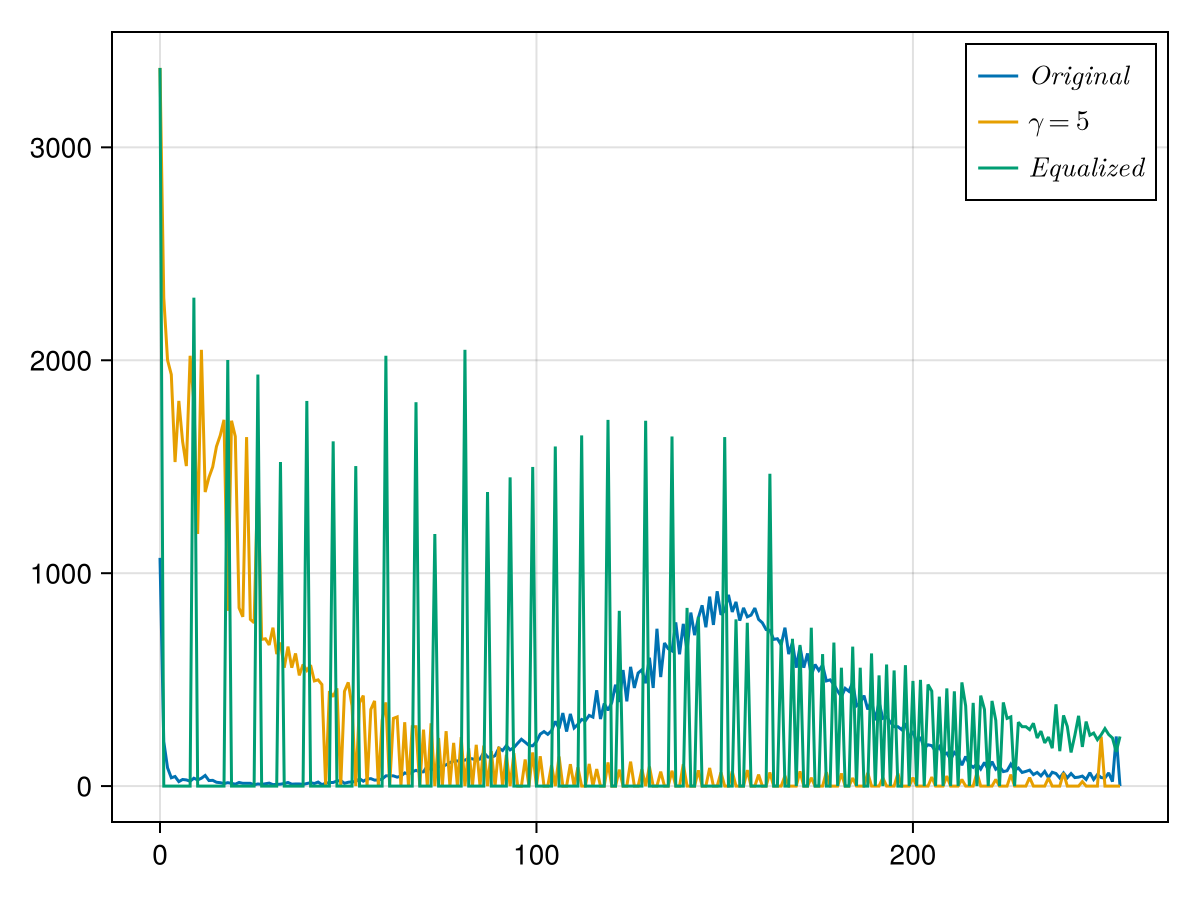

In [9]:
fig = Figure()
ax = Axis(fig[1,1])
for (img, g) in zip([img1, img4, img5], ["Original", "\\gamma=5", "Equalized"])
    b, v = histogram1d(img)
    lines!(ax, b, v, label = L"%$g")
end
axislegend()
fig
#save("equalize_histogram.png", fig)

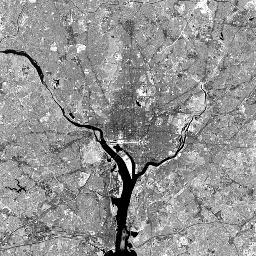

In [10]:
img1

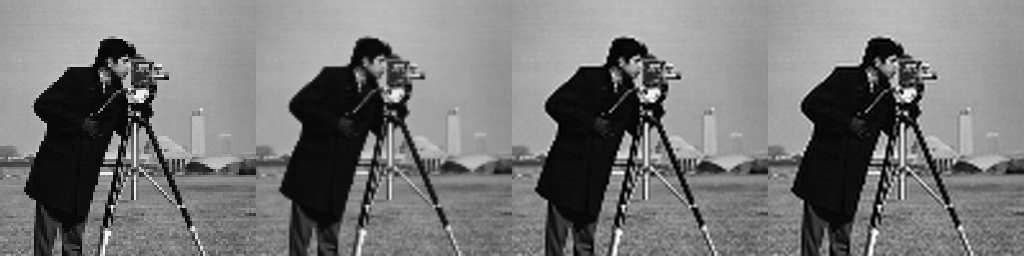

In [93]:
img0= cv.resize(img2mat(testimage("cameraman.tif")), cv.Size{Int32}(100, 100))
img1 = cv.resize(img0, cv.Size(Int32(256), Int32(256));interpolation= cv.INTER_NEAREST)
img2 = cv.resize(img0, cv.Size(Int32(256), Int32(256));interpolation= cv.INTER_LINEAR)
img3 = cv.resize(img0, cv.Size(Int32(256), Int32(256));interpolation= cv.INTER_CUBIC)
img4 = cv.resize(img0, cv.Size(Int32(256), Int32(256));interpolation= cv.INTER_LANCZOS4)
s = arr2mat(cat(img1, img2, img3, img4; dims=2))
#cv.imwrite("interpolation.png", s)

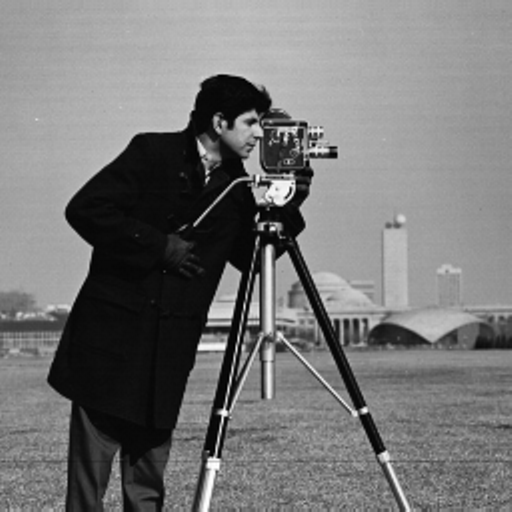

In [112]:
img0= img2mat(testimage("cameraman.tif"))


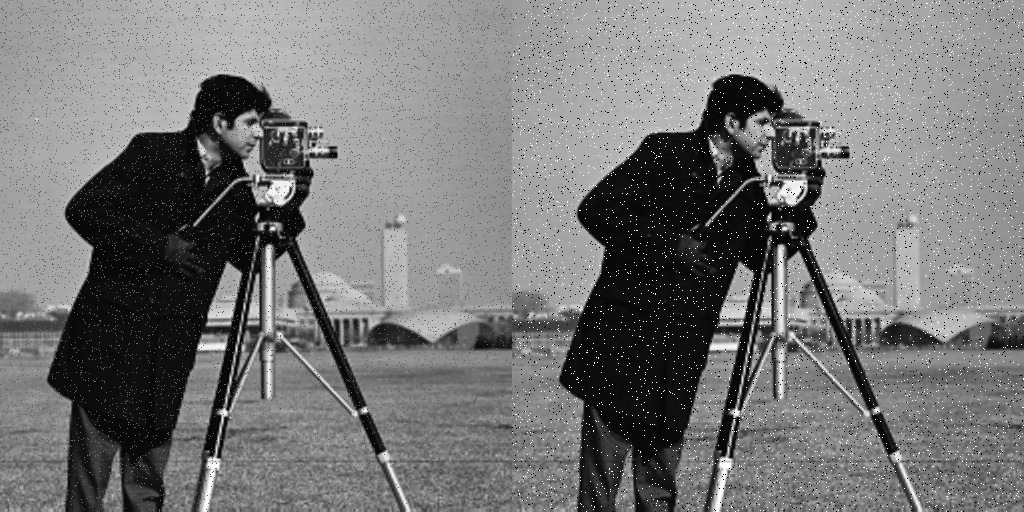

In [113]:
img_gn = gaussian_noise(img0, 100, 10, 10000)
img_sp = salt_pepper_noise(img0, 10000)
img2=arr2mat(cat([img_gn img_sp]; dims=2))

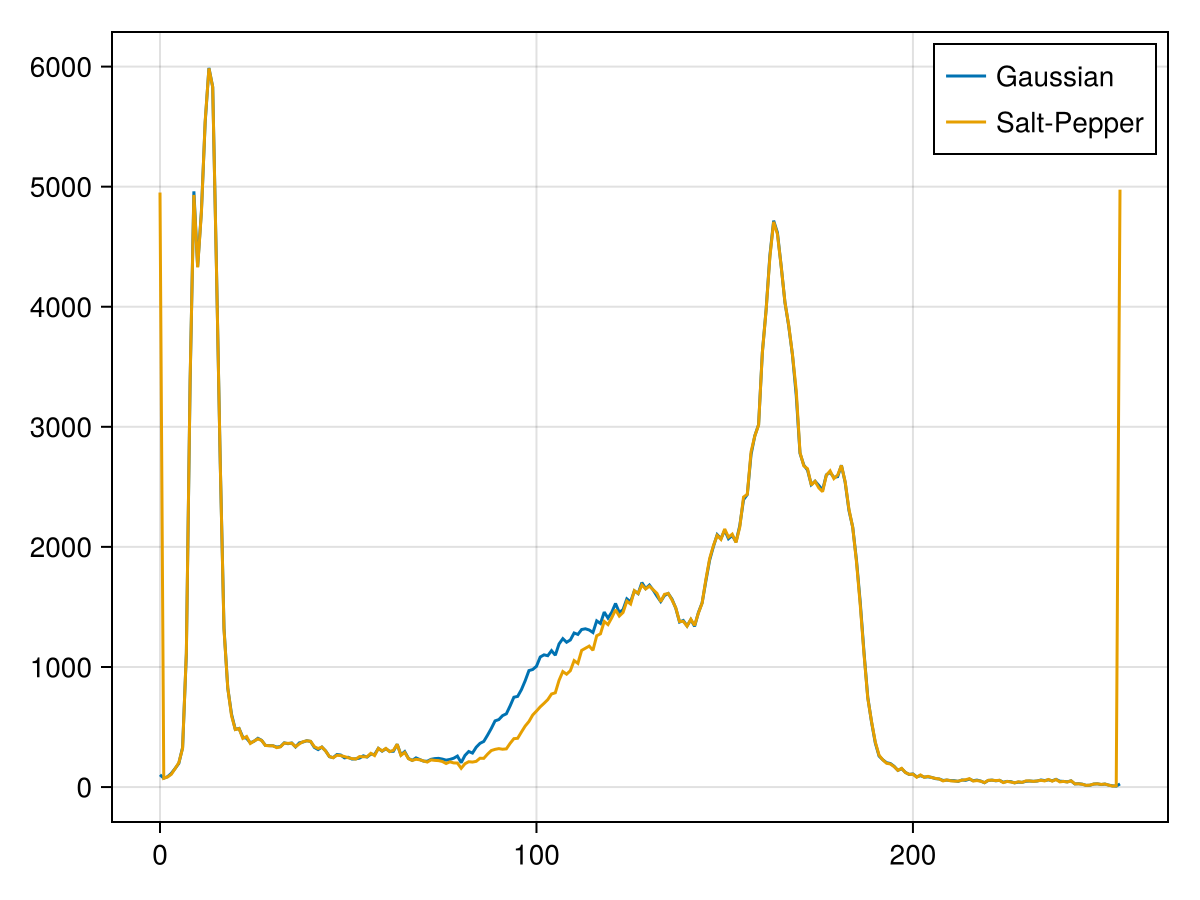

In [115]:
fig = Figure()
ax = Axis(fig[1,1])
for (img, g) in zip([img_gn, img_sp], ["Gaussian", "Salt-Pepper"])
    b, v = histogram1d(img)
    lines!(ax, b, v, label = "$g")
end
axislegend()
fig
#save("noise_histogram.png", fig)


In [117]:
function conv2d(img, ker)
    m, n = size(A)
    p, q = size(k)
    @assert isodd(p) && isodd(q)
    c, d = p>>1, q>>1
    
    R = zero(img)

    dx, dy = div(p,2), div(q, 2)
    for j ∈ (dx+1):(m-dx), i ∈ (dy+1):(n-dy)
        
        for t ∈ 1:q, s ∈ 1:p
            R[i, j] += ker[s, t] * img[i-(s-c-1), j-(t-d-1)]
        end
    end

    return R[dy+1:end-dy, dx+1:end-dx]
end

conv2d (generic function with 1 method)

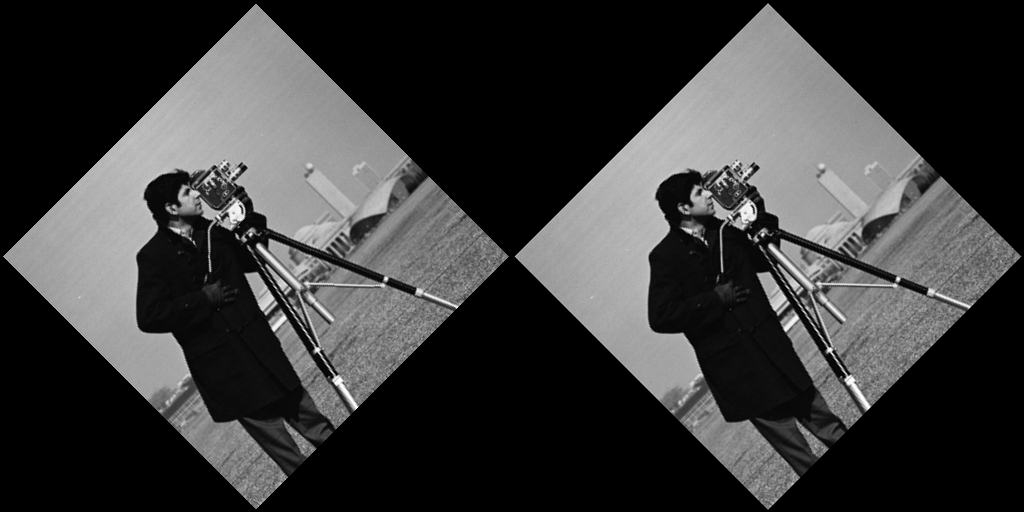

In [ ]:
h, w = size(img0)[2:3]
cX, cY = Float32(h/2), Float32(w/2)
M = cv.getRotationMatrix2D(cvPoint(cX, cY), 45.0, 0.7)
r1 = cv.warpAffine(img0, M, cvSize(w, h), flags=cv.INTER_NEAREST)
r2 = cv.warpAffine(img0, M, cvSize(w, h), flags=cv.INTER_CUBIC)
img3 = arr2mat(cat([r1 r2]; dims=2))

In [156]:
cv.Mat{Int8}(Int8.(abs.(Int16.(r1) .- Int16.(r2))))


MethodError: MethodError: no method matching OpenCV.Mat{Int8}(::Array{Int8, 3})

Closest candidates are:
  OpenCV.Mat{T}(::Any, !Matched::AbstractArray{T, 3}) where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}
   @ OpenCV ~/.julia/artifacts/150dfaafce23ef83fd2922215ca12ea559ad4f8c/OpenCV/src/Mat.jl:8


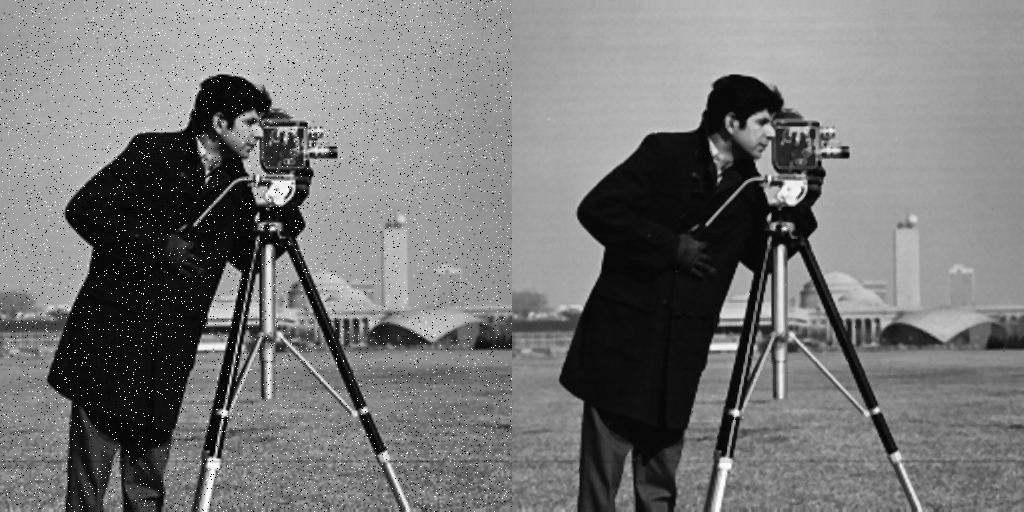

In [160]:
arr2mat(cat([img_sp cv.medianBlur(img_sp, 3)]; dims=2))

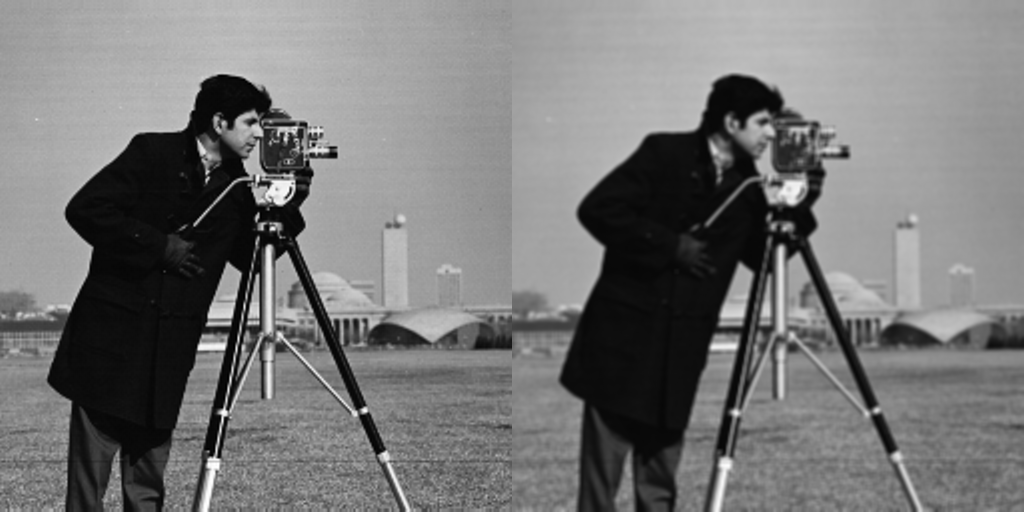

In [173]:
arr2mat(cat([img0 cv.blur(img0, cvSize(5,5
))]; dims=2))

In [122]:
size(cv.getRotationMatrix2D(cv.Point(cX, cY), 45.0, 1.0))

(1, 3, 2)

In [123]:
M2=arr2mat(Float32.([1/√2 1/√2 -256; -1/√2 1/√2 -256]))

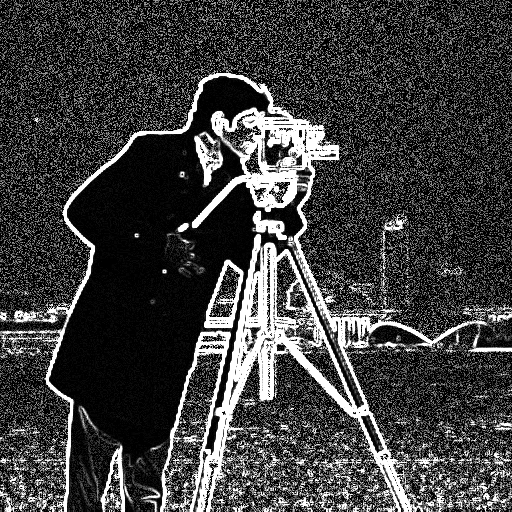

In [200]:
imgx = cv.Mat(convert.(Int32, img0))
imgx_sq = cv.Mat(imgx .* imgx)
imgx_mu = cv.blur(imgx, cvSize(3, 3))
imgx_sqmu = cv.blur(imgx_sq, cvSize(3, 3))
imgx_musq = cv.Mat(imgx_mu .* imgx_mu)
cv.Mat((imgx_sqmu .- imgx_musq))

In [201]:
aa= imgx_sqmu .- imgx_musq;

In [202]:
extrema(aa)

(-221, 7490)

In [127]:
p0 = Float32[1 1; 2 1; 3 3]
q0 = Float32[2 3; 3 4; 4 6]
p1, q1 = arr2mat(p0), arr2mat(q0)

(Float32[1.0 1.0;;; 2.0 1.0;;; 3.0 3.0], Float32[2.0 3.0;;; 3.0 4.0;;; 4.0 6.0])

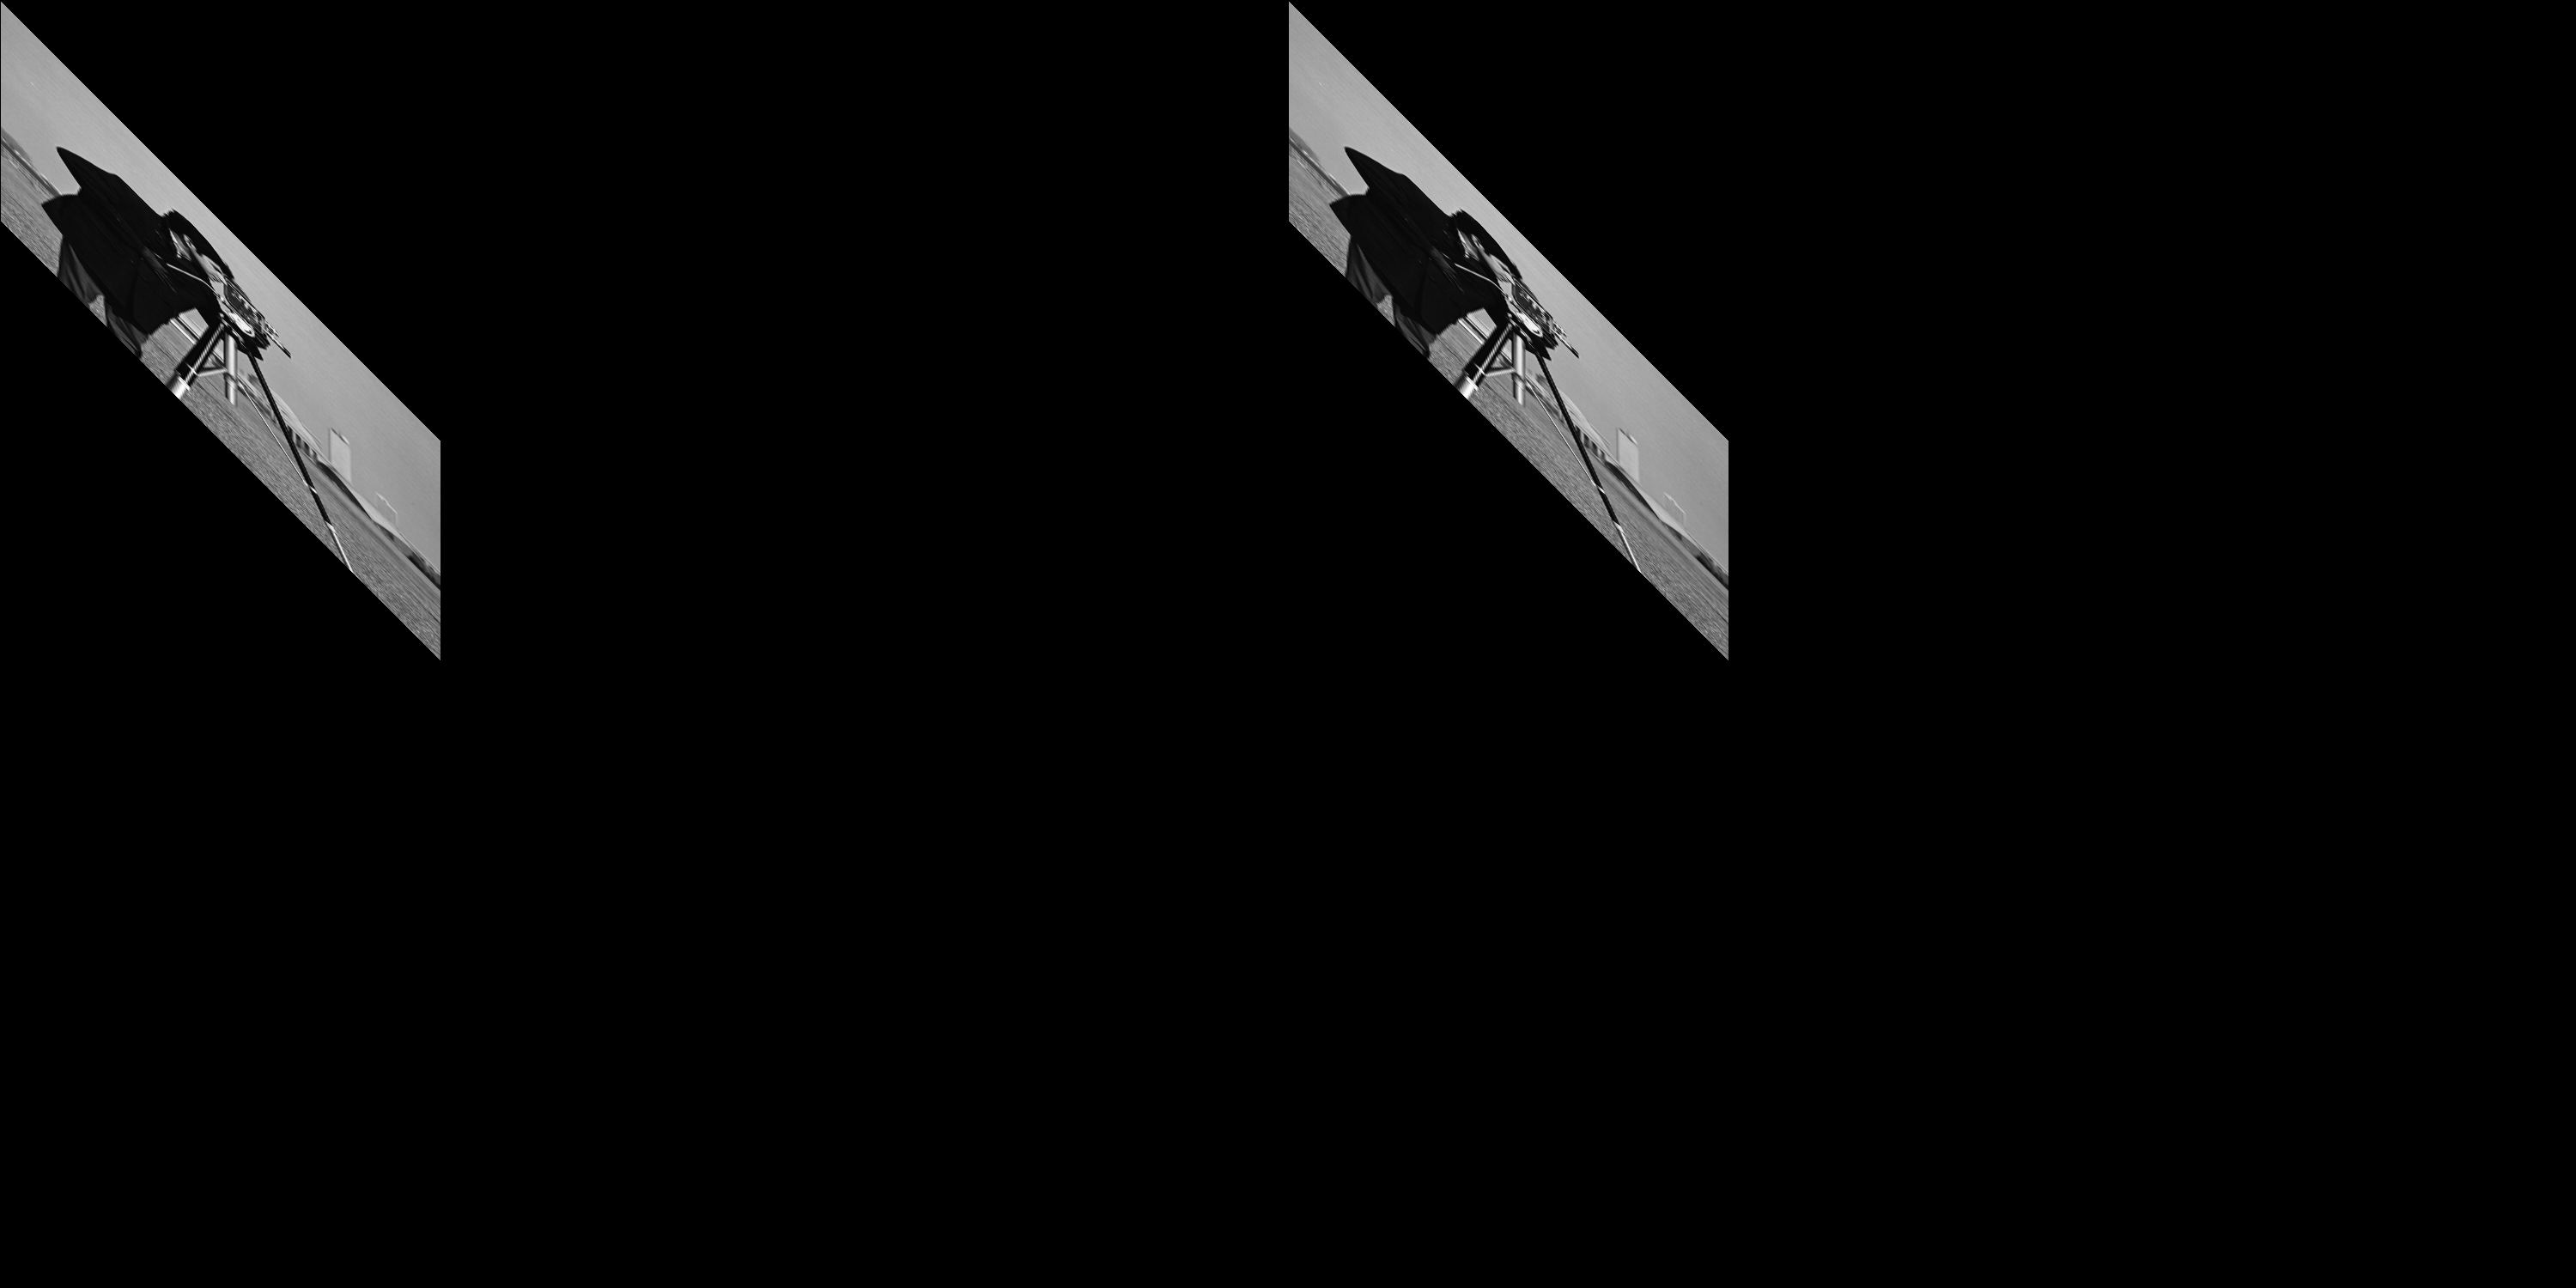

In [142]:
h=cv.getAffineTransform(p1, q1);
img1 = cv.warpAffine(img0, h, cvSize(1500, 1500), flags=cv.INTER_LINEAR)
img2 = cv.warpAffine(img0, h, cvSize(1500, 1500); flags=cv.INTER_LANCZOS4)
img3 = arr2mat(cat([img1 img2]; dims=2))

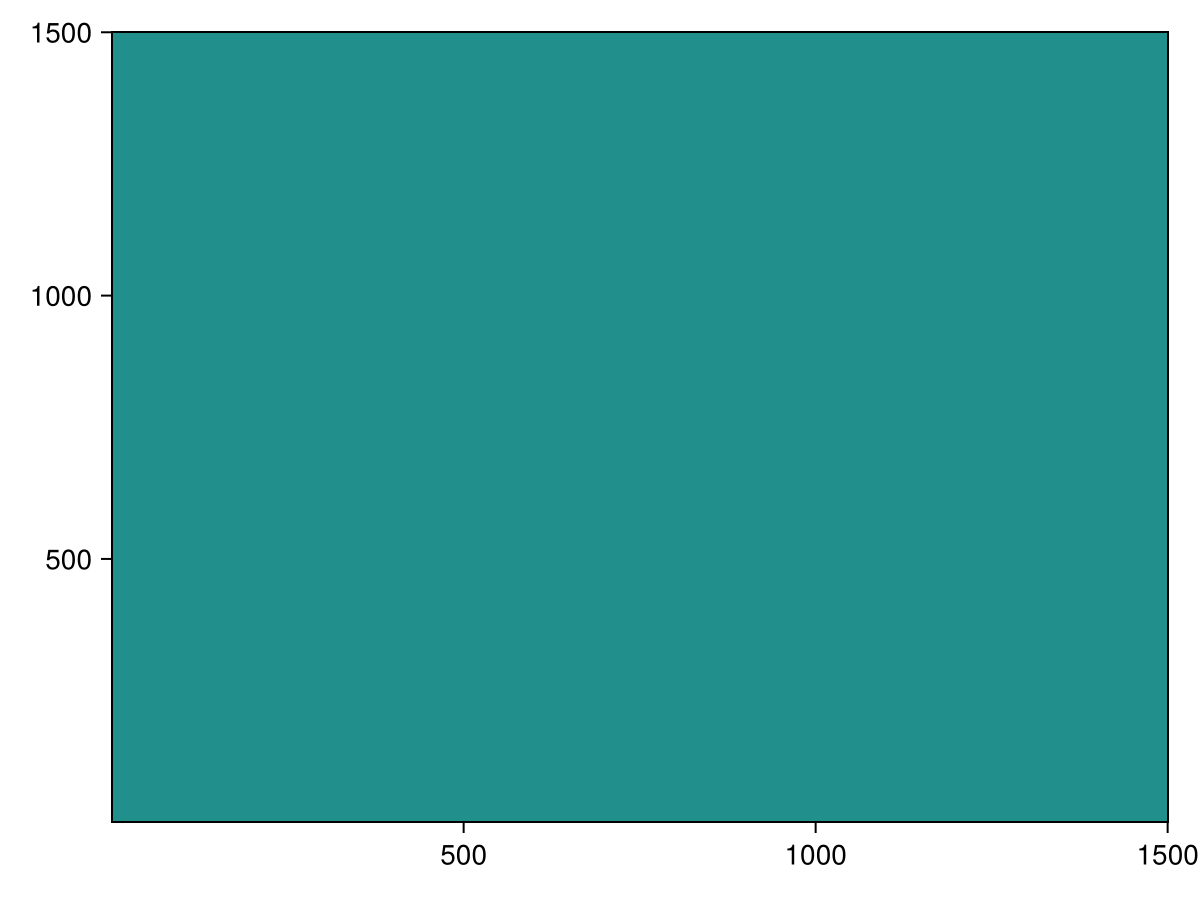

In [137]:
xx = mat2arr(img1) .- mat2arr(img2)
heatmap(xx[:,:,1])

In [135]:
extrema(xx)

(0x00, 0x00)

In [105]:
methods(cv.warpAffine)

# 2 methods for generic function "warpAffine" from OpenCV:
 [1] warpAffine(src::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}, M::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}, dsize::OpenCV.Size{Int32}; dst, flags, borderMode, borderValue)
     @ ~/.julia/artifacts/150dfaafce23ef83fd2922215ca12ea559ad4f8c/OpenCV/src/cv_cxx_wrap.jl:1681
 [2] warpAffine(src::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}, M::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}, dsize::OpenCV.Size{Int32}, dst::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}, flags::Int64, borderMode::Int64, borderValue::Union{Tuple{}, Tuple{Number}, Tuple{Number, Number}, Tuple{Number, Number, Number}, NTuple{4, Number}})
     @ ~/.julia/artifacts/150dfaafce23ef83fd2922215ca12ea559ad4f8c/OpenCV/src/cv_cxx_wrap.jl:1678

In [138]:
cv.cv_INTER_LINEAR

1

In [139]:
typeof(cv.INTER_LINEAR)

Int64